In [29]:
import numpy as np

E = np.genfromtxt('edata.txt', delimiter=',')
m = np.genfromtxt('magdata.txt', delimiter=',')
t = np.genfromtxt('tdata.txt', delimiter=',')
with open('cadata.txt','r') as fh:
    cadata = np.array(eval(fh.read()))
with open('simcadata.txt','r') as fh:
    simcadata = np.array(eval(fh.read()))


Magnetisation:
[0.8257936 0.8248416 0.8235656 0.8192256 0.815516  0.8078216 0.8190904
 0.8162248 0.8043104 0.8055424 0.8023896 0.7845752 0.7737816 0.7862792
 0.7486952 0.6182512 0.5849952 0.4675672 0.344324  0.275176  0.272596
 0.195336  0.1774792 0.1552056 0.1498976 0.1325456 0.121272  0.1126808
 0.1106192 0.1042632]
[0.03201975 0.03202686 0.03167497 0.03224686 0.03171403 0.03228151
 0.03215634 0.03353432 0.03361234 0.03324886 0.03323326 0.03715743
 0.04125023 0.04302682 0.05581365 0.11786864 0.119254   0.1577211
 0.13042739 0.12731835 0.11644147 0.09985132 0.09563644 0.08953496
 0.08745172 0.07692117 0.07519428 0.07076598 0.07135388 0.07223748]

Energy:
[0.1943232 0.1942004 0.1973156 0.198858  0.2019396 0.2086256 0.200034
 0.2014524 0.2092736 0.209382  0.2116152 0.2181392 0.2256112 0.220966
 0.2439528 0.2743168 0.296096  0.3306104 0.3631704 0.3967884 0.4022536
 0.4534988 0.4602936 0.4766364 0.4867852 0.508428  0.5078748 0.531336
 0.5338484 0.537202 ]
[0.00642999 0.0064802  0.0068682

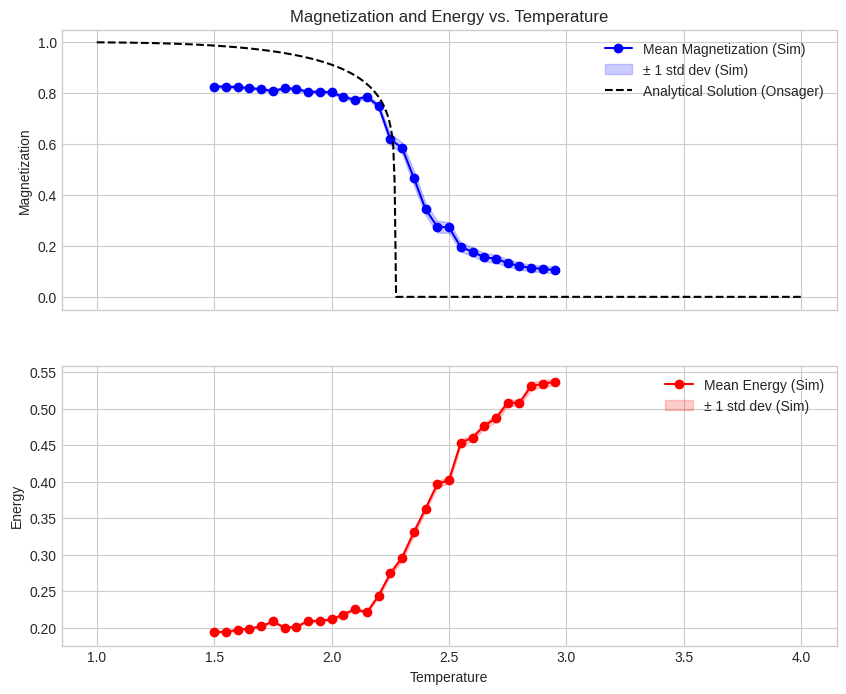

In [4]:
m*=-1

print(f'''
Magnetisation:
{m.mean(axis=1)}
{m.std(axis=1)}

Energy:
{E.mean(axis=1)}
{E.std(axis=1)}

Temperature:
{t}
''')

import numpy as np
import matplotlib.pyplot as plt

# ====================================================================
# PART 1: CALCULATE THE ANALYTICAL SOLUTION (from previous code)
# ====================================================================

# Define the critical temperature (setting J/k_B = 1)
Tc = 2 / np.log(1 + np.sqrt(2))

# Create a high-resolution array of temperatures
# We'll call this T_analytical to keep it separate from the
# (assumed) simulation temperatures 't'
T_analytical = np.linspace(1.0, 4.0, 500)

# Initialize the analytical magnetization array
m_analytical = np.zeros_like(T_analytical)

# Find temperatures below the critical temperature
below_Tc_indices = np.where(T_analytical < Tc)
T_below_Tc = T_analytical[below_Tc_indices]

# Apply Onsager's analytical solution for T < Tc
m_below_Tc_calc = (1.0 - np.sinh(2.0 / T_below_Tc)**(-4))**(1.0/8.0)
m_analytical[below_Tc_indices] = m_below_Tc_calc

# m_analytical now holds the exact solution

print(f"Calculated Analytical Solution. Critical Temperature Tc = {Tc:.4f}")


# ====================================================================
# PART 2: PLOT SIMULATION DATA (your new code)
# ====================================================================
#
# ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
#
#  ERROR: The variables 't', 'm', and 'E' are not defined.
#  You must load your own simulation data into these variables
#  for this part of the code to work.
#
#  - 't' should be a 1D NumPy array of temperatures.
#  - 'm' should be a 2D NumPy array (e.g., [temp_index, run_index])
#    of magnetization results.
#  - 'E' should be a 2D NumPy array of energy results.
#
# ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !

# --- Replace these placeholders with your actual data ---
# EXAMPLE: t = np.loadtxt('temperatures.txt')
# EXAMPLE: m = np.loadtxt('magnetization_data.txt')
# EXAMPLE: E = np.loadtxt('energy_data.txt')

# Ensure these are NumPy arrays for the calculations to work
# This code will fail until 't', 'm', and 'E' are defined.
m_mean = m.mean(axis=1)
m_std =  m.std(axis=1)/pow(m.shape[0],0.5)
E_mean = E.mean(axis=1)
E_std = E.std(axis=1)/pow(E.shape[0],0.5)
# --------------------------------------------------------


# Create a figure with two subplots, one on top of the other
# 'sharex=True' links the x-axis for both plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- Plot 1: Magnetization vs. Temperature ---
ax1.plot(t, m_mean, label='Mean Magnetization (Sim)', color='blue', marker='o')
ax1.fill_between(t, m_mean - m_std, m_mean + m_std, 
                 color='blue', alpha=0.2, label='± 1 std dev (Sim)')

# *** INTEGRATION ***
# Plot the analytical solution from Part 1 on the same axes
ax1.plot(T_analytical, m_analytical, 
         label='Analytical Solution (Onsager)', 
         color='black', linestyle='--')

ax1.set_ylabel('Magnetization')
ax1.set_title('Magnetization and Energy vs. Temperature')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Energy vs. Temperature ---
ax2.plot(t, E_mean, label='Mean Energy (Sim)', color='red', marker='o')
ax2.fill_between(t, E_mean - E_std, E_mean + E_std, 
                 color='red', alpha=0.2, label='± 1 std dev (Sim)')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Energy')
ax2.legend()
ax2.grid(True)

# Save the combined plot
plt.show()

In [26]:
#AI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_rolling_stats(x, y, window_size):
    """
    Calculates the rolling mean and standard error of y, based on a 
    fixed-number-of-points window, after sorting by x.

    Args:
        x (np.array): The x-coordinates.
        y (np.array): The y-coordinates.
        window_size (int): The number of points to include in the rolling window. 
                           This should be an odd number for a true center.

    Returns:
        tuple: (x_sorted, y_mean, y_stderr)
               x_sorted: The sorted x-values.
               y_mean: The rolling mean of y.
               y_stderr: The rolling standard error of y.
    """
    # Create a DataFrame and sort by x to ensure the window is sequential
    df = pd.DataFrame({'x': x, 'y': y}).sort_values('x')
    
    # Use 'center=True' to make the window centered on the current point
    # Use 'min_periods=1' to get calculations even for partial windows at the edges
    rolling_y = df['y'].rolling(window=window_size, center=True, min_periods=1)
    
    # Calculate mean, std, and count for the window
    y_mean = rolling_y.mean()
    y_std = rolling_y.std()
    y_count = rolling_y.count()
    
    # Calculate standard error (stderr = std / sqrt(n))
    # We use np.sqrt(y_count) as the denominator
    y_stderr = y_std / np.sqrt(y_count)
    
    # Return the sorted x values, the mean, and the stderr
    # .values returns the numpy array from the pandas Series
    return df['x'].values, y_mean.values, y_stderr.values

def plot_rolling_stats(x_points, y_points, window_size,col):
    """
    Calculates and plots the rolling statistics for the given data.
    
    Args:
        x_points (np.array): The x-coordinates.
        y_points (np.array): The y-coordinates.
        window_size (int): The size of the rolling window.
    """
    
    # --- 1. Get the moving average and standard error ---
    print(f"Calculating rolling stats with a window of {window_size} points...")
    x_sorted, y_mean, y_stderr = get_rolling_stats(x_points, y_points, window_size)

    # --- 2. Plot the results ---
    print("Plotting results...")
    #plt.figure(figsize=(12, 7))
    #plt.style.use('seaborn-v0_8-whitegrid')

    # Plot the original data as a scatter/dot plot
    plt.scatter(
        x_points, 
        y_points, 
        alpha=0.6, 
        label='Original Data (y)', 
        s=20,  # size of dots
        color='steelblue'
    )

    # Plot the rolling mean as a solid line
    plt.plot(
        x_sorted, 
        y_mean, 
        color=col, 
        linewidth=2.5, 
        label=f'Rolling Mean (window={window_size})'
    )

    # Plot the standard error as a shaded confidence band
    # (y_mean - y_stderr) is the lower bound
    # (y_mean + y_stderr) is the upper bound
    plt.fill_between(
        x_sorted,
        y_mean - y_stderr,  # Lower error bound
        y_mean + y_stderr,  # Upper error bound
        color=col,
        alpha=0.2,
        label='Standard Error (1 SE)'
    )

    # --- 3. Customize the plot ---
    plt.title('Rolling Mean and Standard Error Plot', fontsize=16)
    plt.xlabel('X-Axis', fontsize=12)
    plt.ylabel('Y-Axis', fontsize=12)
    plt.legend(fontsize=10, loc='upper left')

    # --- 4. Show the plot ---
    print("Displaying plot. Close the plot window to exit.")
    #plt.tight_layout()
    #plt.show()


Calculating rolling stats with a window of 50 points...
Plotting results...
Displaying plot. Close the plot window to exit.


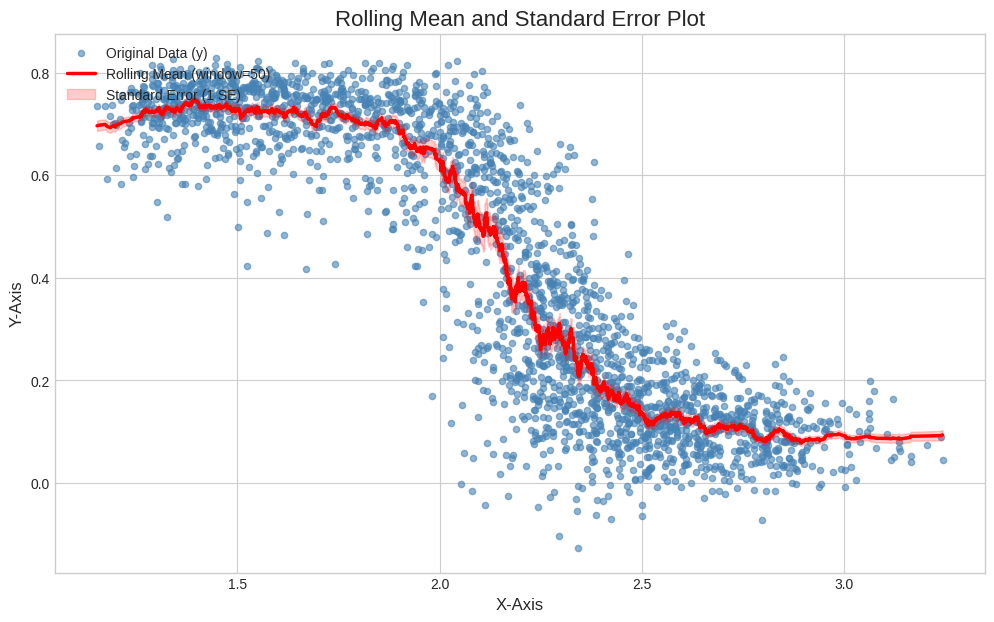

In [31]:
import matplotlib.pyplot as plt

def plotterr(c,f,col):
    cadata1 = np.transpose(c)
    T = f*2.0/np.log(1.0/cadata1[0] - 1.0)
    m_ca = -cadata1[1]
    #plt.scatter(T.clip(0,4),m_ca,color=col)
    plot_rolling_stats(T.clip(0.5,4),m_ca,50,col)

plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plotterr(cadata,1,'red')
#plotterr(simcadata,1,'blue')
plt.show()




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/aarondominic/.local/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/aarondominic/.local/lib/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/aarondominic/.local/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/h

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/aarondominic/.local/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/aarondominic/.local/lib/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/aarondominic/.local/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/h

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/aarondominic/.local/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/aarondominic/.local/lib/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/aarondominic/.local/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/h

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/aarondominic/.local/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/aarondominic/.local/lib/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/aarondominic/.local/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/h

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Analytical Critical Temperature Tc = 2.2692
Error: 'cadata' and 'simcadata' are not defined.
Please load your data in the MAIN SCRIPT section (PART 3).
Plot saved as 'ising_model_combined_plot.png'


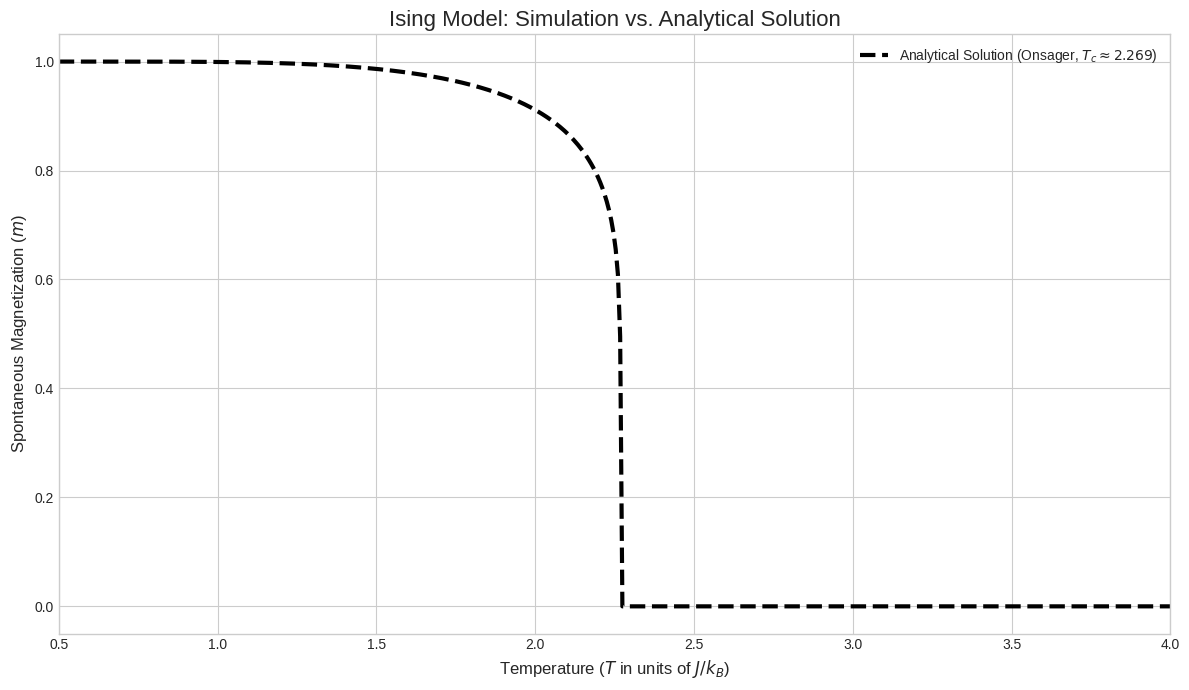

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ====================================================================
# PART 1: CALCULATE THE ANALYTICAL SOLUTION
# ====================================================================

# Define the critical temperature (setting J/k_B = 1)
Tc = 2 / np.log(1 + np.sqrt(2))
print(f"Analytical Critical Temperature Tc = {Tc:.4f}")

# Create a high-resolution array of temperatures
# We match the 0.5 to 4.0 range from your plotterr function
T_analytical = np.linspace(0.5, 4.0, 500)

# Initialize the analytical magnetization array
m_analytical = np.zeros_like(T_analytical)

# Find temperatures below the critical temperature
below_Tc_indices = np.where(T_analytical < Tc)
T_below_Tc = T_analytical[below_Tc_indices]

# Apply Onsager's analytical solution for T < Tc
# m(T) = [1 - sinh(2J/k_B T)^(-4)]^(1/8) (with J/k_B = 1)
# We use np.finfo(float).eps to avoid division by zero if T=0
safe_T = T_below_Tc + np.finfo(float).eps 
m_below_Tc_calc = (1.0 - np.sinh(2.0 / safe_T)**(-4))**(1.0/8.0)
m_analytical[below_Tc_indices] = m_below_Tc_calc

# m_analytical now holds the exact solution from T=0.5 to T=4

# ====================================================================
# PART 2: USER'S FUNCTIONS FOR ROLLING STATISTICS
# ====================================================================

def get_rolling_stats(x, y, window_size):
    """
    Calculates the rolling mean and standard error of y, based on a 
    fixed-number-of-points window, after sorting by x.
    """
    # Create a DataFrame and sort by x to ensure the window is sequential
    df = pd.DataFrame({'x': x, 'y': y}).sort_values('x')
    
    # Use 'center=True' to make the window centered on the current point
    # Use 'min_periods=1' to get calculations even for partial windows at the edges
    rolling_y = df['y'].rolling(window=window_size, center=True, min_periods=1)
    
    # Calculate mean, std, and count for the window
    y_mean = rolling_y.mean()
    y_std = rolling_y.std()
    y_count = rolling_y.count()
    
    # Calculate standard error (stderr = std / sqrt(n))
    y_stderr = y_std / np.sqrt(y_count)
    
    # Return the sorted x values, the mean, and the stderr
    return df['x'].values, y_mean.values, y_stderr.values

def plot_rolling_stats(x_points, y_points, window_size, col, label_prefix):
    """
    Calculates and plots the rolling statistics.
    *** MODIFIED *** to remove title/labels and add a label_prefix.
    """
    
    # --- 1. Get the moving average and standard error ---
    print(f"Calculating rolling stats for '{label_prefix}' with window={window_size}...")
    x_sorted, y_mean, y_stderr = get_rolling_stats(x_points, y_points, window_size)

    # --- 2. Plot the results ---

    # Plot the original data as a subtle scatter/dot plot
    plt.scatter(
        x_points, 
        y_points, 
        alpha=0.1,  # Reduced alpha to make it less noisy
        label=f'{label_prefix} Raw Data', 
        s=10,       # Reduced size
        color=col,
        edgecolors='none' # Remove edges from dots
    )

    # Plot the rolling mean as a solid line
    plt.plot(
        x_sorted, 
        y_mean, 
        color=col, 
        linewidth=2.5, 
        label=f'{label_prefix} Rolling Mean (w={window_size})'
    )

    # Plot the standard error as a shaded confidence band
    plt.fill_between(
        x_sorted,
        y_mean - y_stderr,  # Lower error bound
        y_mean + y_stderr,  # Upper error bound
        color=col,
        alpha=0.2,
        label=f'{label_prefix} 1 SE Band'
    )

    # --- 3. Customize the plot (REMOVED) ---
    # Title, labels, and legend will be added in the main script block
    # for a unified plot.

def plotterr(c, f, col, label_prefix):
    """
    Processes the raw data 'c' and calls the rolling stat plotter.
    *** MODIFIED *** to pass label_prefix and to correctly filter data.
    """
    cadata1 = np.transpose(c)
    cadata1[1] *=-1

    T_all = f * 2.0 / np.log(1.0 / (cadata1[0] + np.finfo(float).eps) - 1.0)
    m_ca_all = cadata1[1]
    
    # *** BUG FIX ***
    # Clip T to the range [0.5, 4] and create a mask
    # This ensures T and m_ca are filtered together
    clip_mask = (T_all >= 0.5) & (T_all <= 4)
    T = T_all[clip_mask]
    m_ca = m_ca_all[clip_mask]
    
    if len(T) == 0:
        print(f"Warning: No data found for '{label_prefix}' in T range [0.5, 4]. Skipping.")
        return

    print(f"Plotting for '{label_prefix}': Found {len(T)} data points in range.")
    
    # Use the correctly filtered data for plotting
    plot_rolling_stats(T, m_ca, 300, col, label_prefix)

# ====================================================================
# PART 3: MAIN SCRIPT - EXECUTION
# ====================================================================

# ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
#
#  ERROR: The variables 'cadata' and 'simcadata' are not defined.
#  You must load your own simulation data into these variables
#  for this part of the code to work.
#
#  Example (replace with your actual data loading):
#
#  cadata = np.loadtxt('my_data_file_1.txt')
#  simcadata = np.loadtxt('my_data_file_2.txt')
#
# ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !


# --- Create the plot ---
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

# --- Plot the user's simulation data ---
# This will fail until 'cadata' and 'simcadata' are defined above
try:
    plotterr(cadata, 1, 'red', label_prefix='Data 1')
    plotterr(simcadata, 1, 'blue', label_prefix='Data 2')
except NameError:
    print("Error: 'cadata' and 'simcadata' are not defined.")
    print("Please load your data in the MAIN SCRIPT section (PART 3).")
    # As a fallback, we'll just plot the analytical solution
    pass

# --- Plot the analytical solution (from Part 1) ---
plt.plot(
    T_analytical, 
    m_analytical,
    color='black',
    linestyle='--',
    linewidth=3,
    label=f'Analytical Solution (Onsager, $T_c \\approx {Tc:.3f}$)'
)

# --- Add final plot customizations ---
plt.title('Ising Model: Simulation vs. Analytical Solution', fontsize=16)
plt.xlabel('Temperature ($T$ in units of $J/k_B$)', fontsize=12)
plt.ylabel('Spontaneous Magnetization ($m$)', fontsize=12)

# Set plot limits to match the data range
plt.xlim(0.5, 4.0)
plt.ylim(-0.05, 1.05)

# Collect all labels for a single, unified legend
plt.legend(fontsize=10, loc='upper right')

# --- Show and save the final plot ---
plt.tight_layout()
plt.savefig('ising_model_combined_plot.png')
print("Plot saved as 'ising_model_combined_plot.png'")
plt.show()

/home/aarondominic/.local/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


IndexError: index 1 is out of bounds for axis 0 with size 1

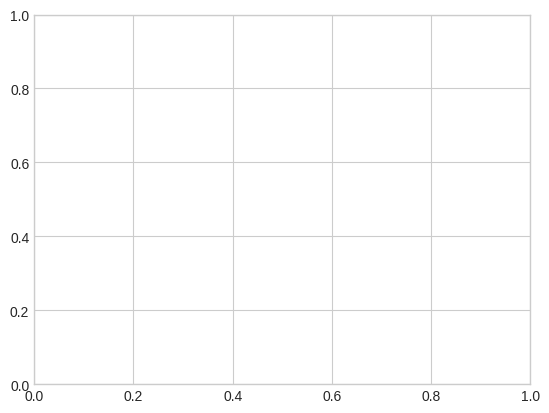

In [83]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

#for i in range(len(t)):
#    plot_acf(E[i], lags=1000, title=f'ACF E, T={t[i]}') 

import pandas as pd



for i in range(len(t)):


    df = pd.DataFrame({'original':m[i]})

    df['low_freq_noise'] = df['original'].rolling(window=1000, center=True).mean()

    df['small_noise'] = df['original'] - df['low_freq_noise']

    fig = plot_acf(df['small_noise'].dropna(), lags=100, title=f'ACF m, T={t[i]}') 
    ax = fig.gca()
    ax.set_yscale('log')

    ax.set_ylim(bottom=0.01) 

    plt.show()

0